**RESULTS VISUALISATIONS**

In [ ]:
# HeatMAP
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset
xls_dict = pd.read_excel('/content/drive/MyDrive/Eval_final.csv', sheet_name=None)

# We define the lsit of models and criteria
models = ['ChatGPT', 'BARD AI', 'AgentGPT', 'BabyAGI']
criteria = ['Arena', 'Vehicle', 'Differentiators', 'Staging', 'Economic Logic']

# For a heatmap, we have to reshape the data
reshaped_data = pd.DataFrame()

# reshape data
for model in models:
    df = xls_dict[model].copy()
    melted_df = df.melt(id_vars='Prompt', value_vars=criteria, var_name='Criterion', value_name='Score')
    melted_df['Model'] = model  # Add column for model
    reshaped_data = reshaped_data.append(melted_df)

# We pivot
heatmap_data = reshaped_data.pivot_table(index=['Model', 'Prompt'], columns='Criterion', values='Score')

# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")
plt.title('')
plt.show()


In [ ]:
#OVERALL PERFORMANCE BY MODELS
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# We Load the DF
xls_dict = pd.read_excel('/content/drive/MyDrive/Eval_final.csv', sheet_name=None)

# Models
models = ['ChatGPT', 'BARD AI', 'AgentGPT', 'BabyAGI']

# Emptu df
average_scores_per_criterion = pd.DataFrame()

# Load dataframes
for model in models:
    if model in xls_dict:
        df = xls_dict[model]
        avg_scores = df.iloc[:, 1:].mean()  # Calculate
        avg_scores_df = pd.DataFrame(avg_scores).transpose()
        avg_scores_df.insert(0, "Model", model)  # Model name
        average_scores_per_criterion = average_scores_per_criterion.append(avg_scores_df)

# We reset the model as index
average_scores_per_criterion.set_index('Model', inplace=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(average_scores_per_criterion, annot=True, cmap='YlGnBu')
plt.title('Average Scores by Criterion and Model')
plt.show()


<ipython-input-15-8c11fdd8137c>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reshaped_data = reshaped_data.append(df)
<ipython-input-15-8c11fdd8137c>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reshaped_data = reshaped_data.append(df)
<ipython-input-15-8c11fdd8137c>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reshaped_data = reshaped_data.append(df)
<ipython-input-15-8c11fdd8137c>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reshaped_data = reshaped_data.append(df)


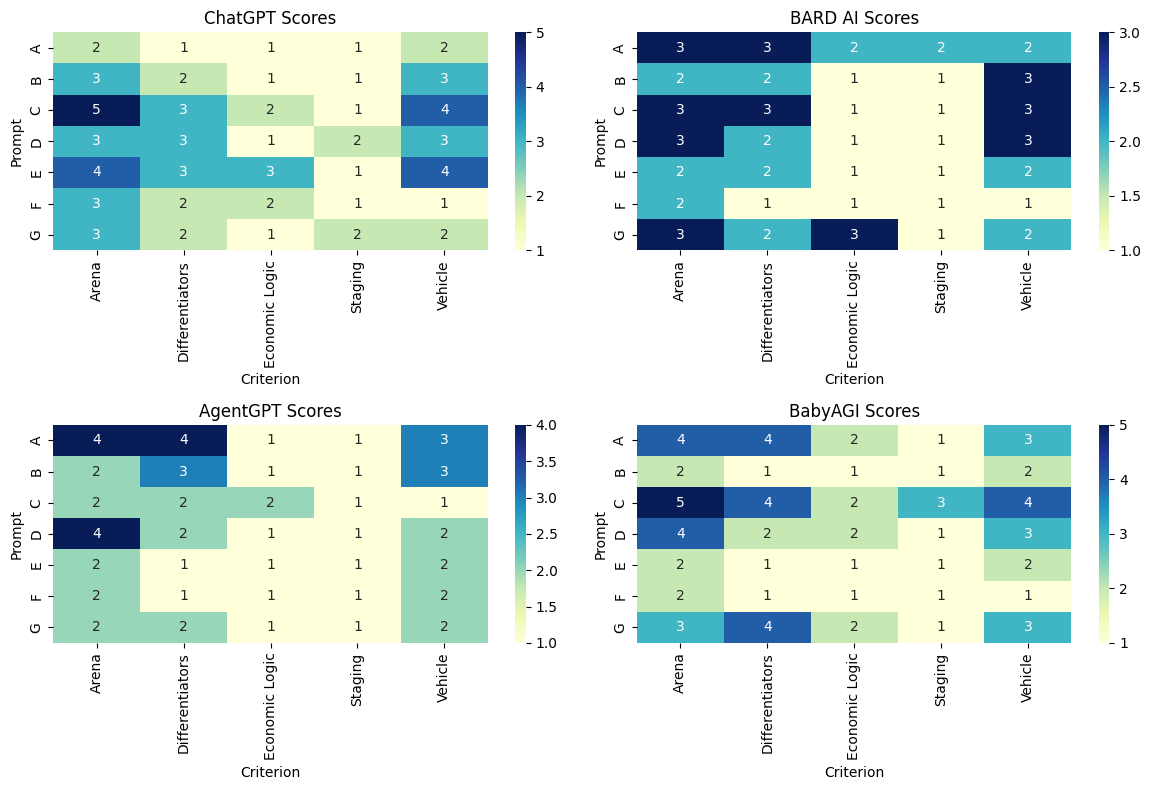

In [15]:
#HEATMAP 2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load file into excel
xls = pd.ExcelFile('/content/drive/MyDrive/Eval_final.csv')

# Define
models = ['ChatGPT', 'BARD AI', 'AgentGPT', 'BabyAGI']
criteria = ['Arena', 'Vehicle', 'Differentiators', 'Staging', 'Economic Logic']

# Initialize
reshaped_data = pd.DataFrame()

# loop through each model
for model in models:
    df = pd.read_excel(xls, model)
    df = df.melt(id_vars='Prompt', value_vars=criteria, var_name='Criterion', value_name='Score')
    df['Model'] = model  # Add a model name column
    reshaped_data = reshaped_data.append(df)

# pivot
heatmap_data = reshaped_data.pivot_table(index=['Model', 'Prompt'], columns='Criterion', values='Score')

# create a grid of heatmaps
plt.figure(figsize=(12, 8))
for i, model in enumerate(models):
    plt.subplot(2, 2, i + 1)  #sizing
    model_data = heatmap_data.xs(model)  # data extraction
    sns.heatmap(model_data, annot=True, cmap='YlGnBu')
    plt.title(f'{model} Scores')
    plt.xlabel('Criterion')
    plt.ylabel('Prompt')
plt.tight_layout()  # Ensure no overlap between subplots
plt.show()



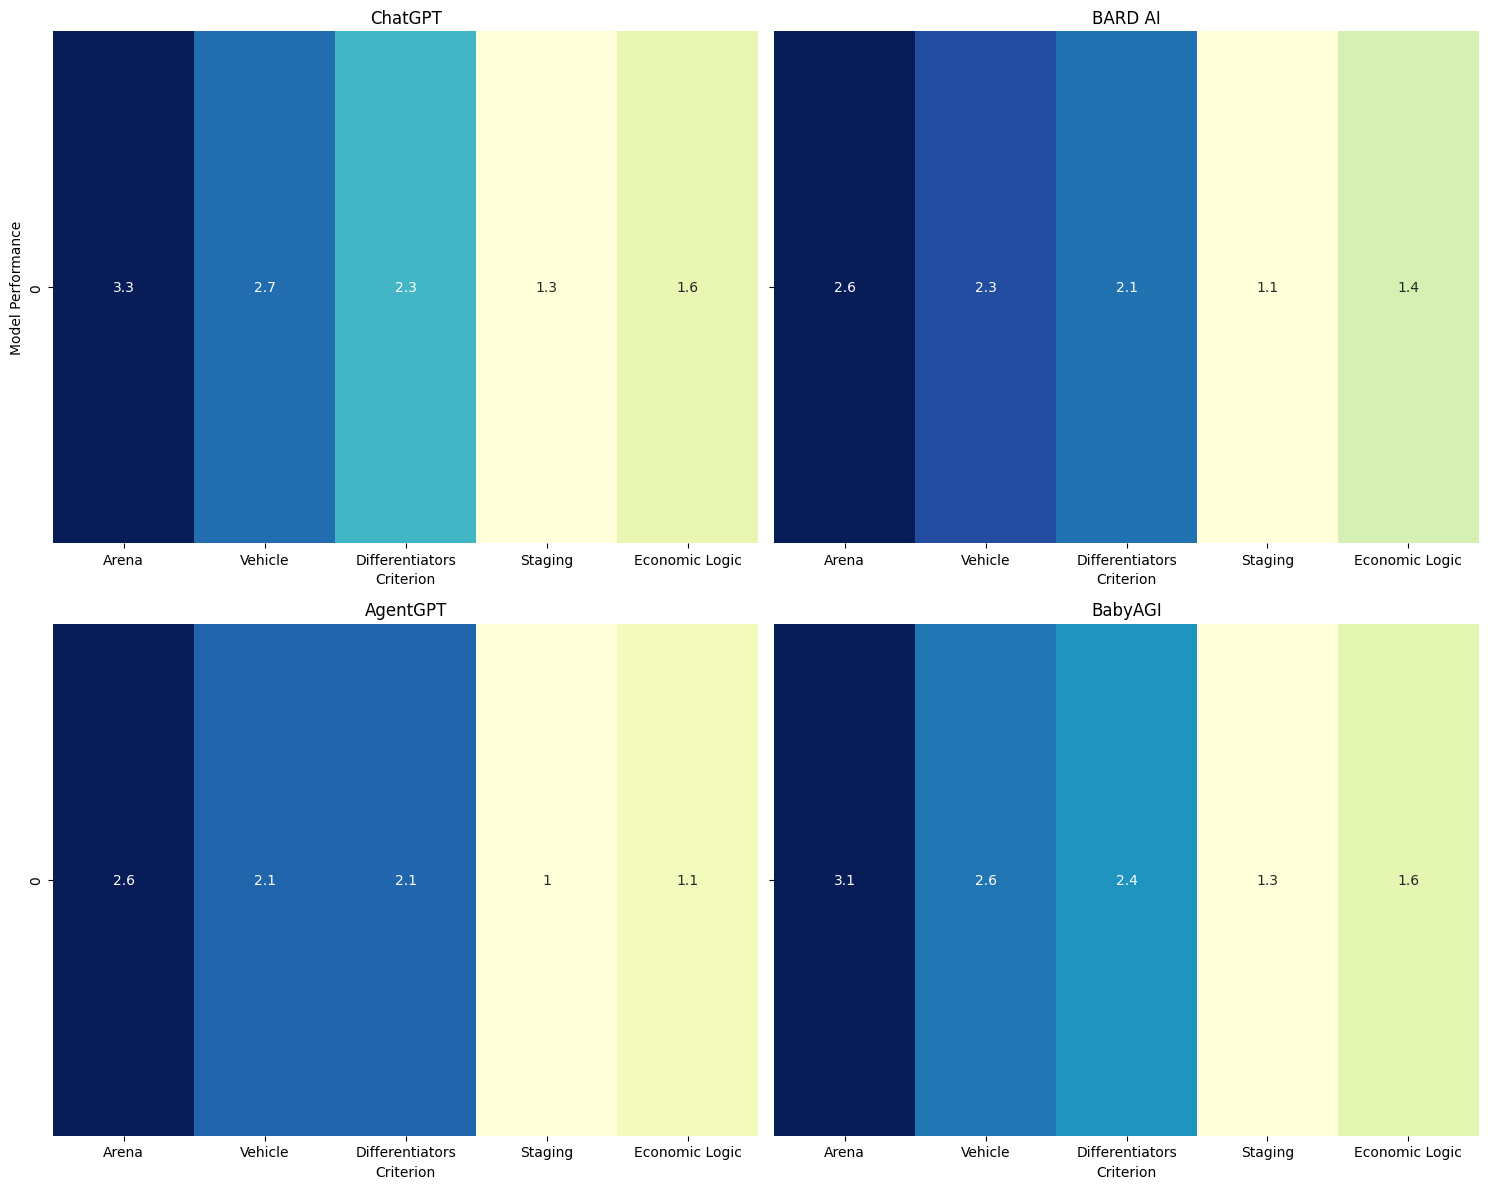

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


xls = pd.ExcelFile('/content/drive/MyDrive/Eval_final.csv')

# DEFINE
models = ['ChatGPT', 'BARD AI', 'AgentGPT', 'BabyAGI']

# row numbers
num_rows = len(models) // 2 + len(models) % 2

# create subplots to display
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 6*num_rows), sharey=True)

# loop through each model
for i, model in enumerate(models):
    df = pd.read_excel(xls, model)
    heatmap_data = df.iloc[:, 1:].mean()
    row_idx = i // 2
    col_idx = i % 2
    sns.heatmap(pd.DataFrame(heatmap_data).T, annot=True, cmap='YlGnBu', ax=axes[row_idx, col_idx], cbar=False)
    axes[row_idx, col_idx].set_title(model)
    axes[row_idx, col_idx].set_xlabel('Criterion')

# remove empty subplots
for i in range(len(models), num_rows * 2):
    fig.delaxes(axes.flatten()[i])

axes[0, 0].set_ylabel('Model Performance')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load
xls = pd.ExcelFile('/content/drive/MyDrive/Eval_final.csv')

# define
models = ['ChatGPT', 'BARD AI', 'AgentGPT', 'BabyAGI']

# intiialise
average_scores = pd.DataFrame()

for model in models:
    df = pd.read_excel(xls, model)
    avg_score = df.iloc[:, 1:].mean().mean()  # Calculate average across all prompts and criteria
    average_scores = average_scores.append(pd.DataFrame({'Model': [model], 'Average Score': [avg_score]}))

# Set index
average_scores.set_index('Model', inplace=True)

# plot
plt.figure(figsize=(10, 6))
sns.barplot(data=average_scores, x=average_scores.index, y='Average Score', palette='Blues')
plt.xlabel('Model')
plt.ylabel('Average Score')
plt.title('')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

models = ['ChatGPT', 'BARD AI', 'AgentGPT', 'BabyAGI']

# Create an empty df
avg_scores_by_prompt = pd.DataFrame()

# load
for model in models:
    df = pd.read_excel(xls, model)
    df['Average Score'] = df.iloc[:, 1:].mean(axis=1)  # we calculate avg
    df['Model'] = model  # add a model column
    avg_scores_by_prompt = avg_scores_by_prompt.append(df[['Prompt', 'Average Score', 'Model']])
# pivot
avg_scores_by_prompt = avg_scores_by_prompt.pivot(index='Prompt', columns='Model', values='Average Score')

# plot
avg_scores_by_prompt.plot(kind='line', marker='o', title='')
plt.ylabel('Average Score')
plt.show()


In [17]:

xls = pd.read_excel('/content/drive/MyDrive/Eval_final.csv', sheet_name=None)


for sheet_name, df in xls.items():
    # Add a 'Model' column to each DataFrame
    df['Model'] = sheet_name


df = pd.concat(xls.values(), ignore_index=True)


**Further Exploration : Stats & Tables**

In [8]:
df['Score'] = df[['Arena', 'Vehicle', 'Differentiators', 'Staging', 'Economic Logic']].mean(axis=1)


In [9]:
model_stats = df.groupby('Model')['Score'].agg(['mean', 'median', 'std', 'var'])


In [10]:
prompt_stats = df.groupby('Prompt')['Score'].agg(['mean', 'median', 'std', 'var'])


In [ ]:
# group by criteria score and model
grouped_scores = df.groupby('Model')["Arena","Vehicle","Differentiators","Staging","Economic Logic"]

#  perform descrptive analysis
for model, scores in grouped_scores:
    print("Model:", model)
    print(scores.describe())
    print()


In [ ]:
import pandas as pd



criteria = ['Arena', 'Vehicle', 'Differentiators', 'Staging', 'Economic Logic']
models = ['AgentGPT', 'BARD AI', 'BabyAGI', 'ChatGPT']

#  empty dictionary to store results
mean_scores = {}

# loop over models
for model in models:
    # filter for current model
    model_df = df[df['Model'] == model]

    # calculate the mean score for each model
    mean_scores[model] = {criterion: model_df[criterion].mean() for criterion in criteria}

# store results in dataframe
mean_scores_df = pd.DataFrame(mean_scores)

# transpose the df
mean_scores_df = mean_scores_df.transpose()

# print
print(mean_scores_df)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# we create a table using matplotlib
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')  # we turn off axis

# round values
model_stats_rounded = model_stats.round(2).astype(str)

# create the table
table_data = []
for model, row in model_stats_rounded.iterrows():
    table_data.append([model, row['mean'], row['median'], row['std'], row['var']])

col_labels = ['Model', 'Mean', 'Median', 'Std', 'Var']
table = ax.table(cellText=table_data, colLabels=col_labels, cellLoc='center', loc='upper center')

# formatting
table.auto_set_font_size(False)
table.set_fontsize(10)

# formmating
for cell in table.get_celld().values():
    cell.set_fontsize(10)

# display
plt.show()
